# Personal Key Indicators of Heart Disease

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# Business Understanding

In [2]:
ds=pd.read_csv("heart_2020_cleaned.csv")
ds.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
ds.tail(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319785,No,31.93,No,Yes,No,0.0,0.0,No,Male,65-69,Hispanic,No,Yes,Good,7.0,No,No,No
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No
319787,No,36.54,No,No,No,7.0,0.0,No,Male,30-34,Hispanic,No,No,Good,9.0,No,No,No
319788,No,23.38,No,No,No,0.0,0.0,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


# Data Understanding

In [4]:
ds.shape

(319795, 18)

# Data Set Understanding

In [5]:
ds.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
ds.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [8]:
ds.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [9]:
ds["HeartDisease"].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
ds["HeartDisease"].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [11]:
ds["BMI"].unique()

array([16.6 , 20.34, 26.58, ..., 62.42, 51.46, 46.56])

In [12]:
ds["BMI"].value_counts()

26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
59.85       1
50.59       1
92.53       1
62.95       1
46.56       1
Name: BMI, Length: 3604, dtype: int64

In [13]:
ds["Smoking"].value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

In [14]:
ds["Smoking"].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
ds["AlcoholDrinking"].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
ds["AlcoholDrinking"].value_counts()

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

In [17]:
ds["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
ds["Sex"].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

In [19]:
ds["DiffWalking"].value_counts()

No     275385
Yes     44410
Name: DiffWalking, dtype: int64

In [20]:
ds["DiffWalking"].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
ds["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [22]:
ds["AgeCategory"].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [23]:
ds["Race"].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [24]:
ds["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [25]:
ds["Diabetic"].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [26]:
ds["Diabetic"].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [27]:
ds["PhysicalActivity"].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
ds["PhysicalActivity"].value_counts()

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64

In [29]:
ds["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [30]:
ds["GenHealth"].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [31]:
ds["Asthma"].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
ds["KidneyDisease"].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
ds["SkinCancer"].unique()

array(['Yes', 'No'], dtype=object)

In [34]:
#sperate the contiouns and categorical data 
continous=["BMI","PhysicalHealth","MentalHealth","SleepTime"]
catgorical=["HeartDisease","Smoking","AlcoholDrinking","Stroke","DiffWalking","Sex","AgeCategory","Race","Diabetic","PhysicalActivity","GenHealth","Asthma","KidneyDisease","SkinCancer"]

# data preparation #EDA base line 

In [35]:
ds.describe(include="all")

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [36]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


# contiouns data on histogram 

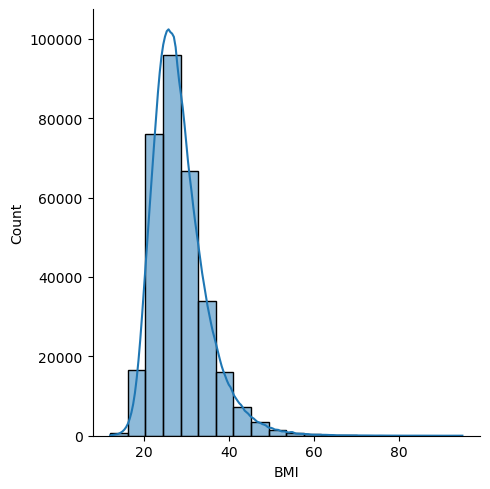

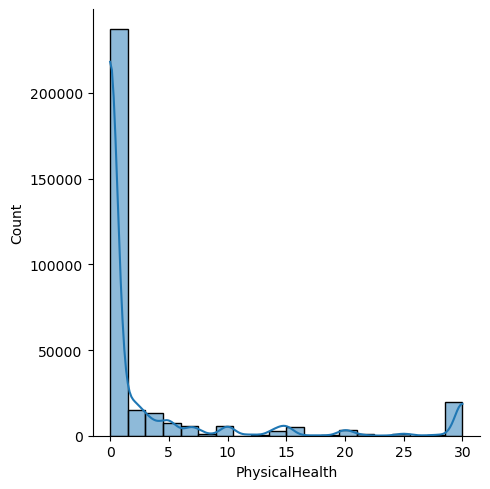

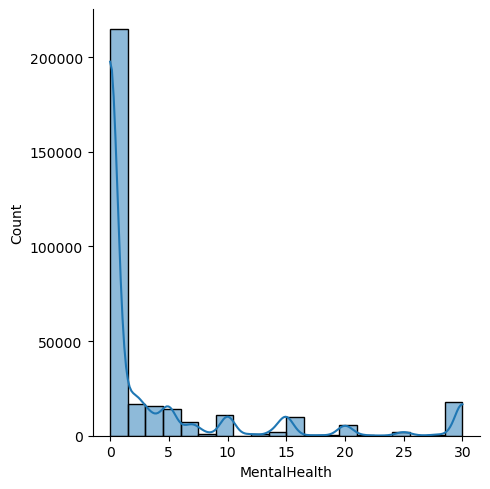

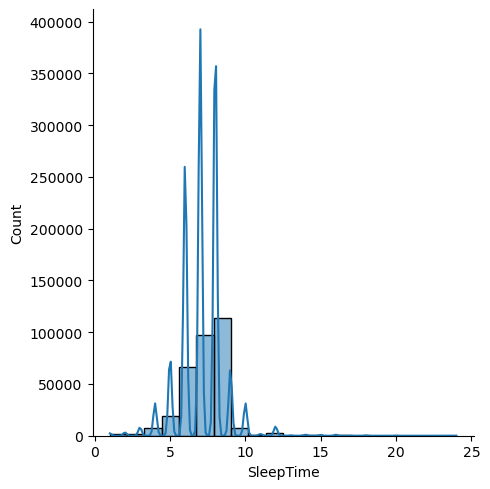

In [37]:
for i in range(len(continous)):
    sns.displot(x=continous[i],data=ds,kde=True,bins=20)
    plt.show()

In [38]:
ds["BMI"].skew()

1.3324306428979513

In [39]:
ds["PhysicalHealth"].skew()

2.6039732622480822

In [40]:
ds["MentalHealth"].skew()

2.331111549136165

In [41]:
ds["SleepTime"].skew()

0.6790346208011537

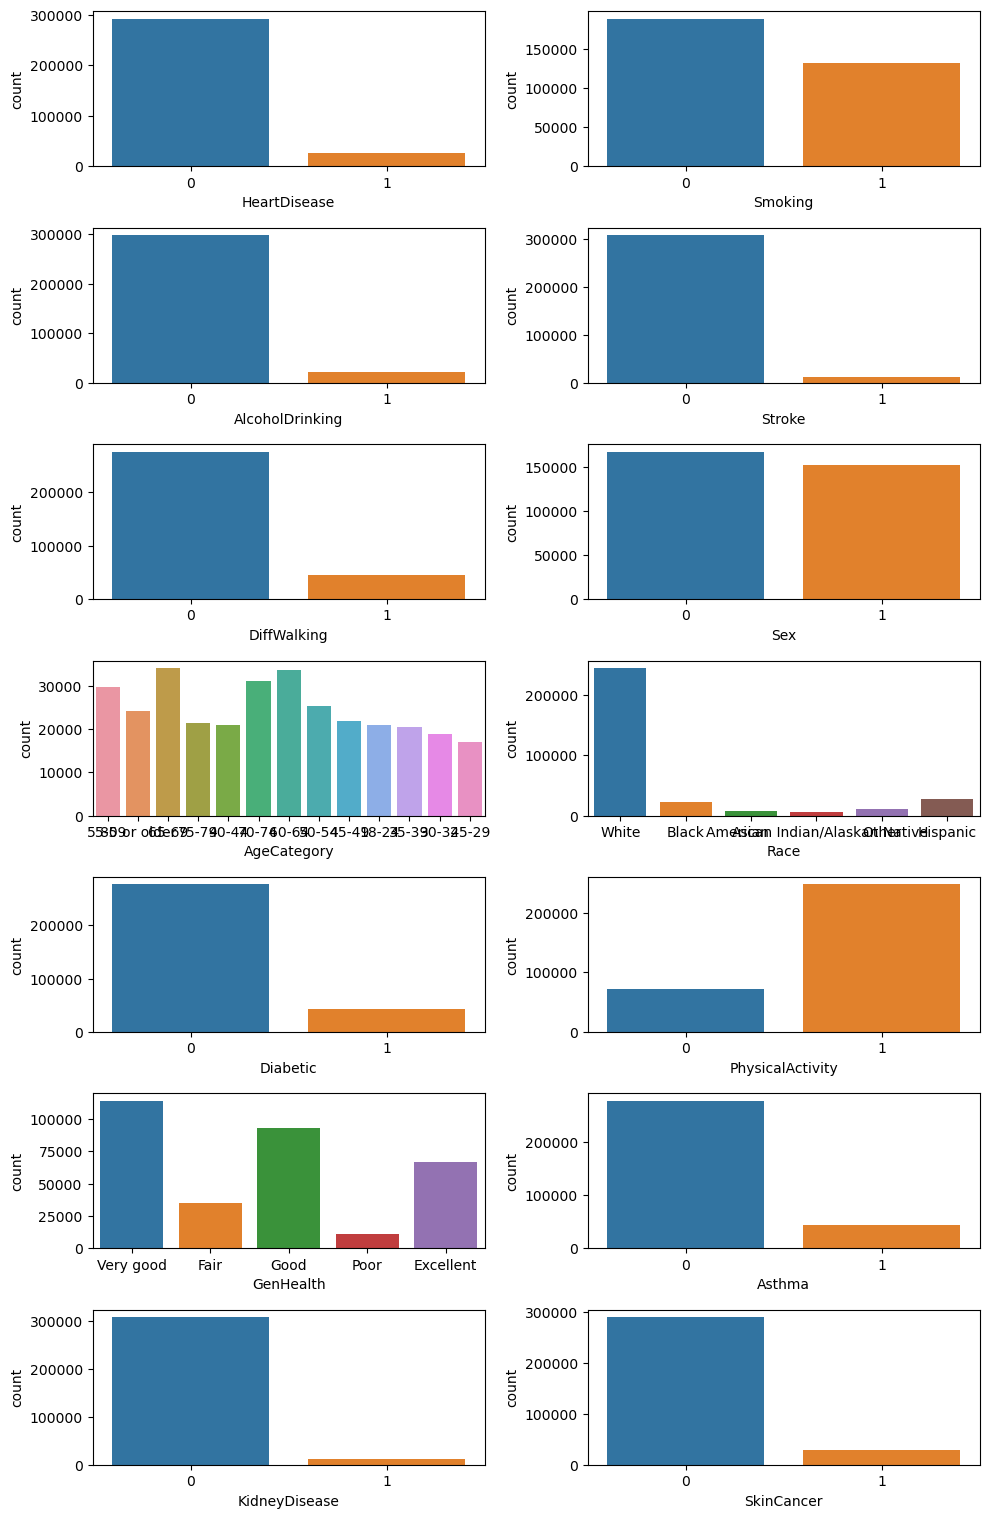

In [76]:
""""#for i in range(len(catgorical)):
    sns.countplot(x=catgorical[i],data=ds)
    plt.show()"""

plt.figure(figsize=(10,30))
for i ,column in enumerate(catgorical):
    plt.subplot(len(catgorical),2,i+1)
    
    sns.countplot(x=column,data=ds)
    #plt.show()
    plt.tight_layout()

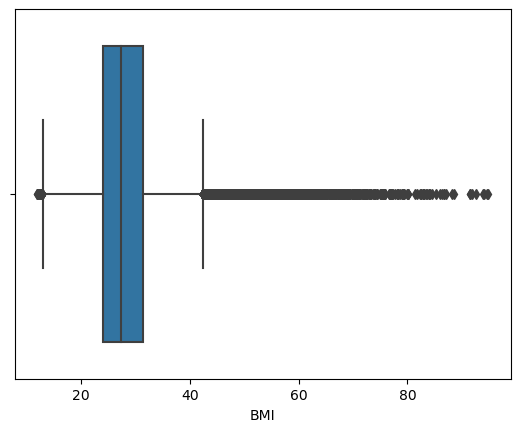

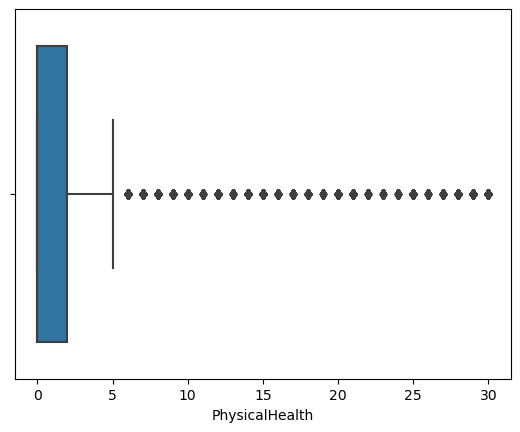

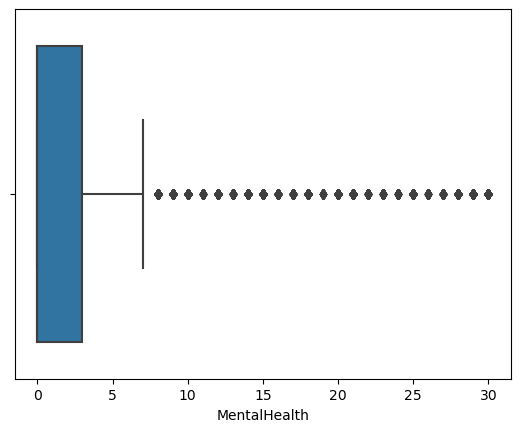

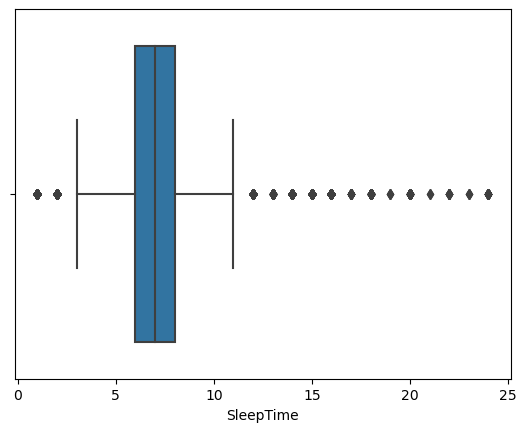

In [44]:
for i in range(len(continous)):
    sns.boxplot(x=continous[i],data=ds)
    plt.show()

In [45]:
ds =  ds[ds.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
ds['Diabetic'] = ds['Diabetic'].astype(int)

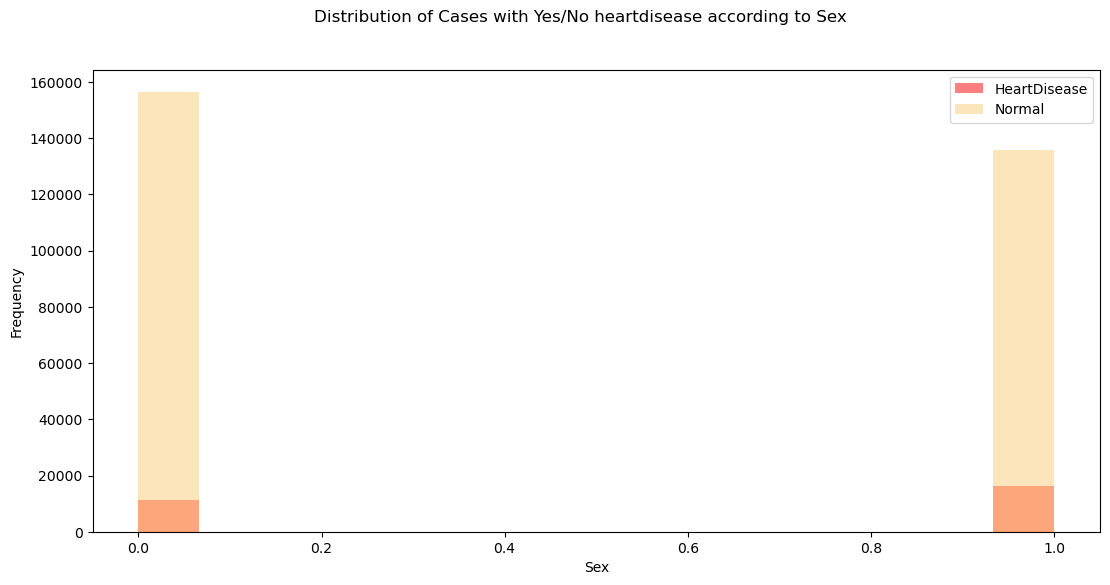

In [46]:
plt.subplots(figsize = (13,6))
plt.hist(ds[ds["HeartDisease"]==1]["Sex"], bins=15, alpha=0.5, color="red", label="HeartDisease")
plt.hist(ds[ds["HeartDisease"]==0]["Sex"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

plt.xlabel("Sex")
plt.ylabel("Frequency")

plt.suptitle("Distribution of Cases with Yes/No heartdisease according to Sex")

plt.legend()

# Remember that number one refers to men and 0 refers to women on the x-axis.
Most cases of heart disease are men .
Most cases that got no hart disease are women 

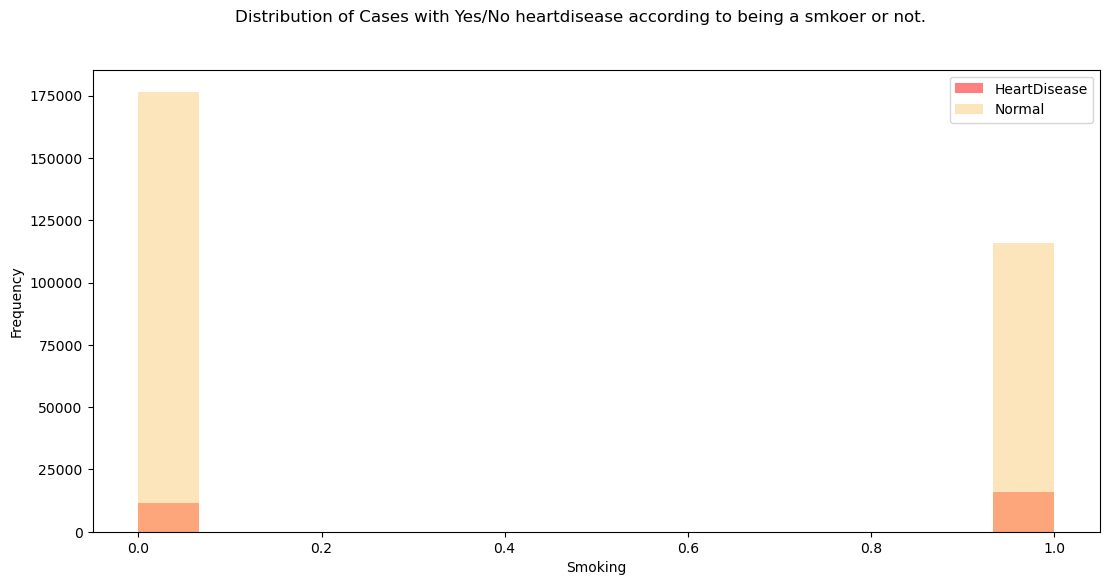

In [47]:
plt.subplots(figsize = (13,6))

plt.hist(ds[ds["HeartDisease"]==1]["Smoking"], bins=15, alpha=0.5, color="red", label="HeartDisease")
plt.hist(ds[ds["HeartDisease"]==0]["Smoking"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

plt.xlabel("Smoking")
plt.ylabel("Frequency")

plt.suptitle("Distribution of Cases with Yes/No heartdisease according to being a smkoer or not.")

plt.legend()

# For smokers, they are the largest group that suffers from heart disease.
There are also cases of heart disease, although they don't smoke, this is related to other factors.

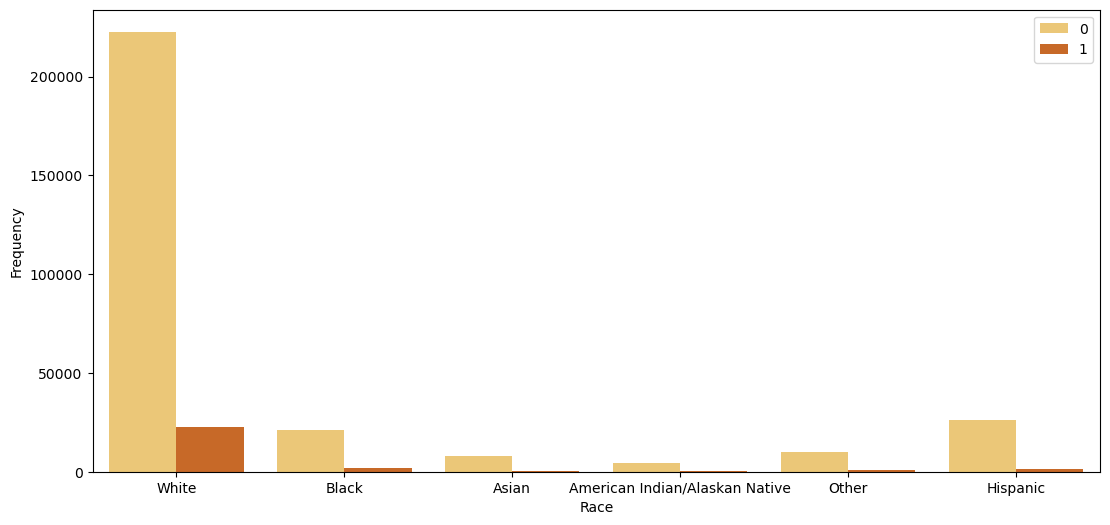

In [48]:
plt.figure(figsize = (13,6))
sns.countplot( x= ds['Race'], hue = 'HeartDisease', data = ds, palette = 'YlOrBr')
plt.xlabel('Race')
plt.legend()
plt.ylabel('Frequency')
plt.show()

# yes refers to heartdisease.
no refers to normal state.
We can see that white people are more susceptible to heart disease.

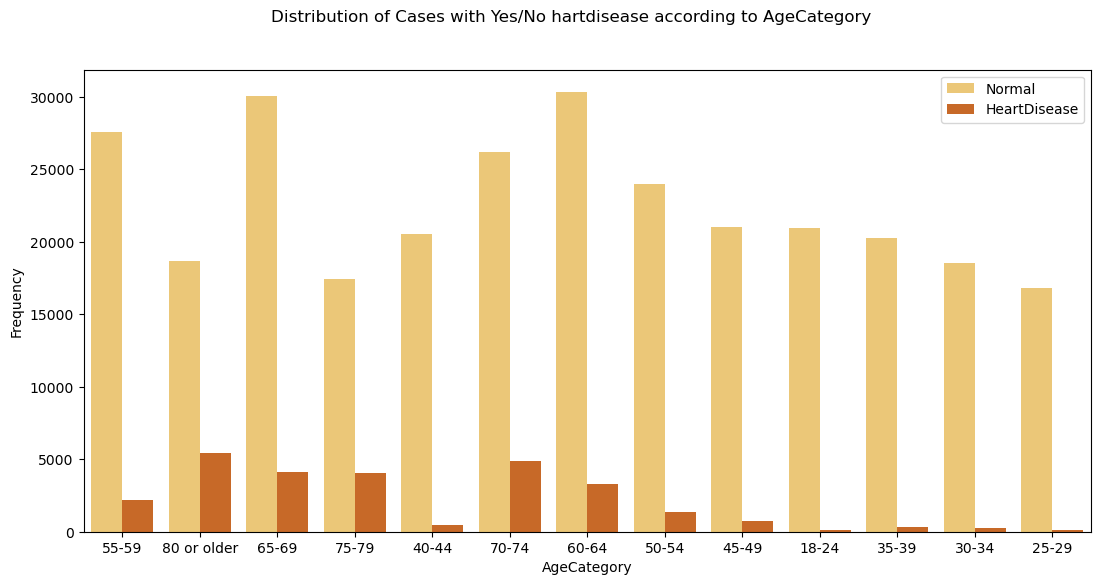

In [49]:
plt.figure(figsize = (13,6))
sns.countplot(x = ds['AgeCategory'], hue = 'HeartDisease', data = ds, palette = 'YlOrBr')
plt.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

# We can see that people who are 80 or older are more likely to get HeartDiseases.


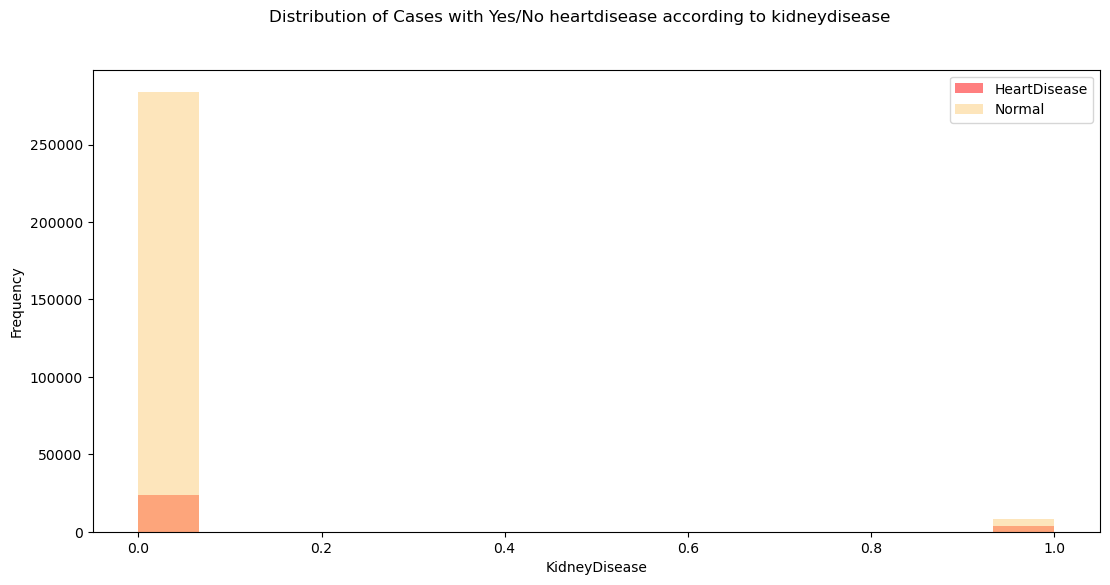

In [50]:
plt.subplots(figsize = (13,6))

plt.hist(ds[ds["HeartDisease"]==1]["KidneyDisease"], bins=15, alpha=0.5, color="red", label="HeartDisease")
plt.hist(ds[ds["HeartDisease"]==0]["KidneyDisease"], bins=15, alpha=0.5, color="#fccc79", label="Normal")
plt.xlabel("KidneyDisease")
plt.ylabel("Frequency")

plt.suptitle("Distribution of Cases with Yes/No heartdisease according to kidneydisease")

plt.legend()

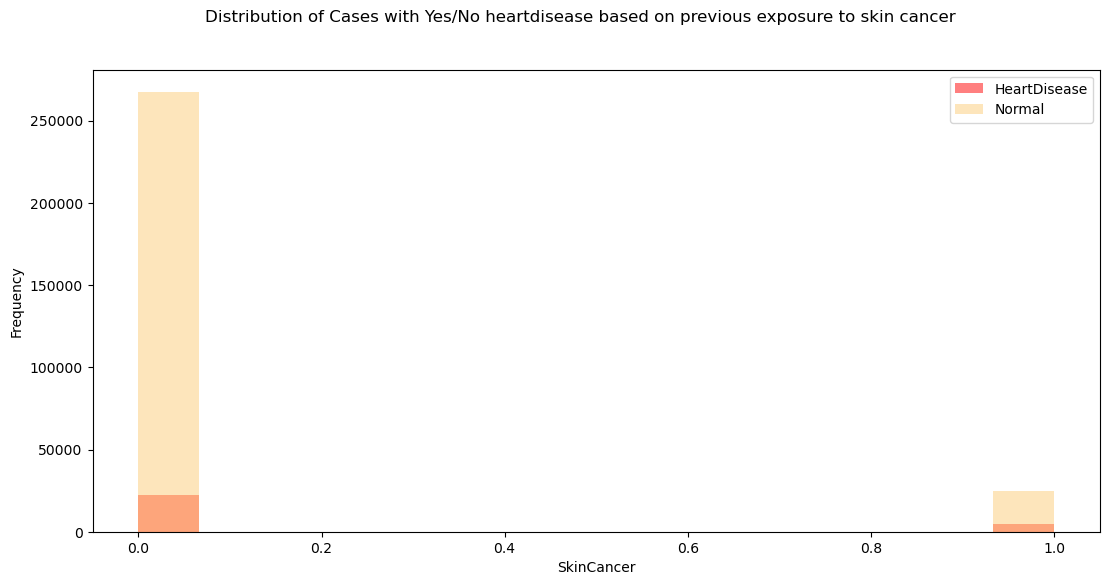

In [51]:
plt.subplots(figsize = (13,6))

plt.hist(ds[ds["HeartDisease"]==1]["SkinCancer"], bins=15, alpha=0.5, color="red", label="HeartDisease")
plt.hist(ds[ds["HeartDisease"]==0]["SkinCancer"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

plt.xlabel("SkinCancer")
plt.ylabel("Frequency")

plt.suptitle("Distribution of Cases with Yes/No heartdisease based on previous exposure to skin cancer")

plt.legend()

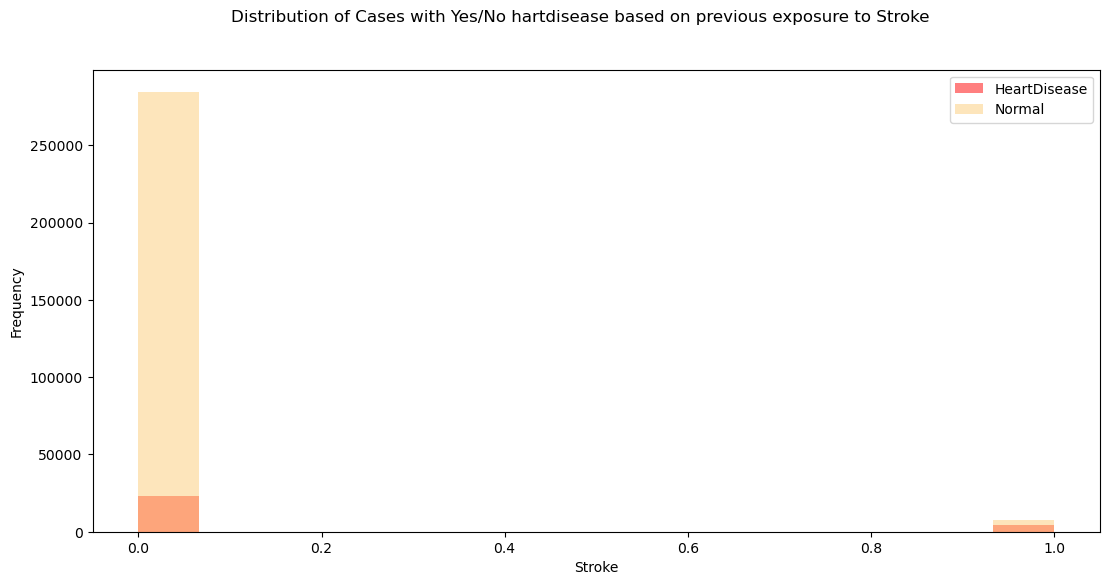

In [52]:
plt.subplots(figsize = (13,6))
plt.hist(ds[ds["HeartDisease"]==1]["Stroke"], bins=15, alpha=0.5, color="red", label="HeartDisease")
plt.hist(ds[ds["HeartDisease"]==0]["Stroke"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

plt.xlabel("Stroke")
plt.ylabel("Frequency")

plt.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Stroke")

plt.legend()

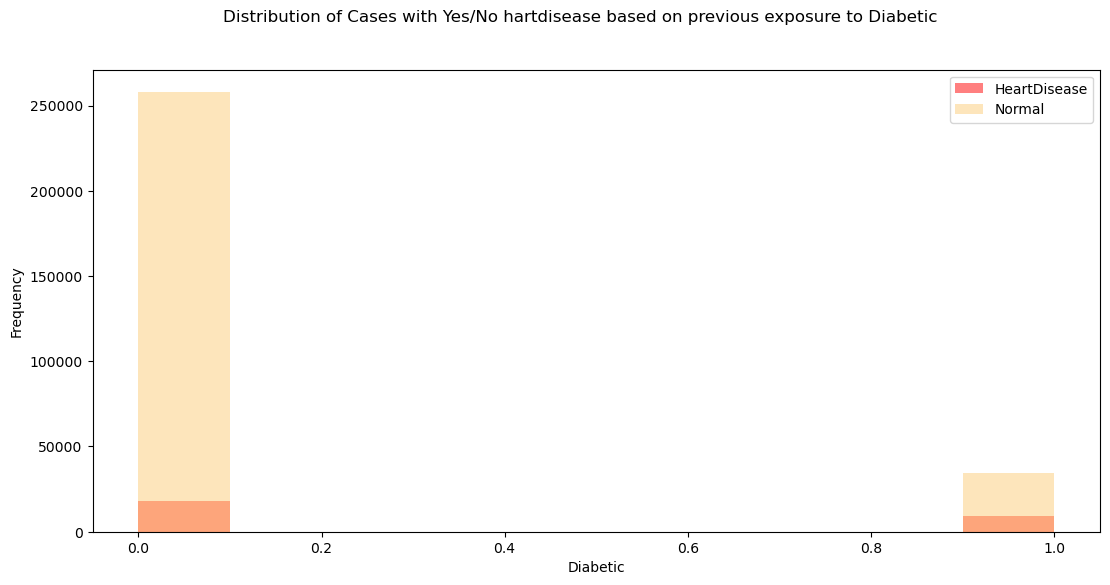

In [53]:
plt.subplots(figsize = (13,6))

plt.hist(ds[ds["HeartDisease"]==1]["Diabetic"], bins=10, alpha=0.5, color="red", label="HeartDisease")
plt.hist(ds[ds["HeartDisease"]==0]["Diabetic"], bins=10, alpha=0.5, color="#fccc79", label="Normal")

plt.xlabel("Diabetic")
plt.ylabel("Frequency")

plt.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Diabetic")

plt.legend()

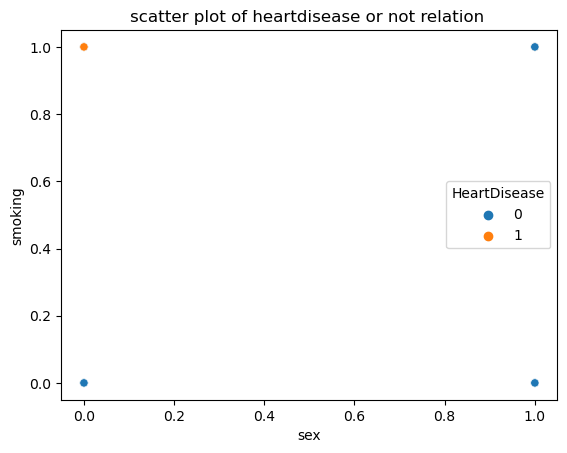

In [54]:
sns.scatterplot(x="Sex",y="Smoking",hue="HeartDisease",data=ds)
plt.xlabel("sex")
plt.ylabel("smoking")
plt.title("scatter plot of heartdisease or not relation ")
plt.show()

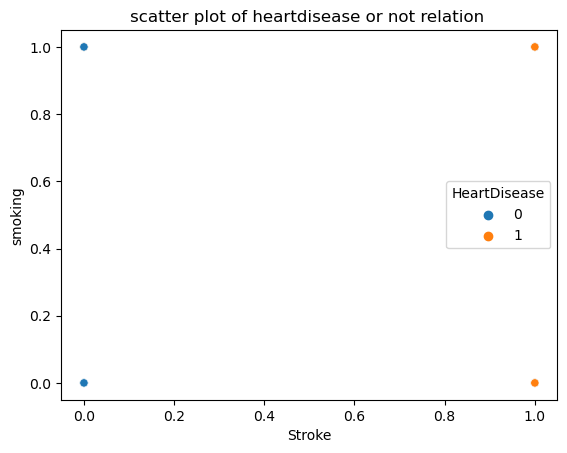

In [55]:
sns.scatterplot(x="Stroke",y="Smoking",hue="HeartDisease",data=ds)
plt.xlabel("Stroke")
plt.ylabel("smoking")
plt.title("scatter plot of heartdisease or not relation ")
plt.show()

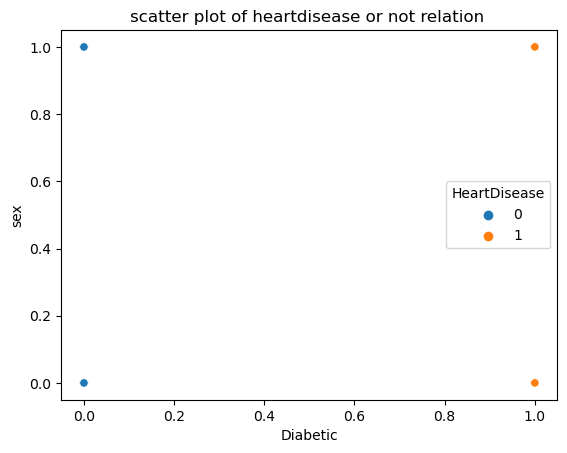

In [56]:
sns.scatterplot(x="Diabetic",y="Sex",hue="HeartDisease",data=ds)
plt.xlabel("Diabetic")
plt.ylabel("sex")
plt.title("scatter plot of heartdisease or not relation ")
plt.show()

In [57]:
#sns.pairplot(ds,hue="HeartDisease")
#plt.show()

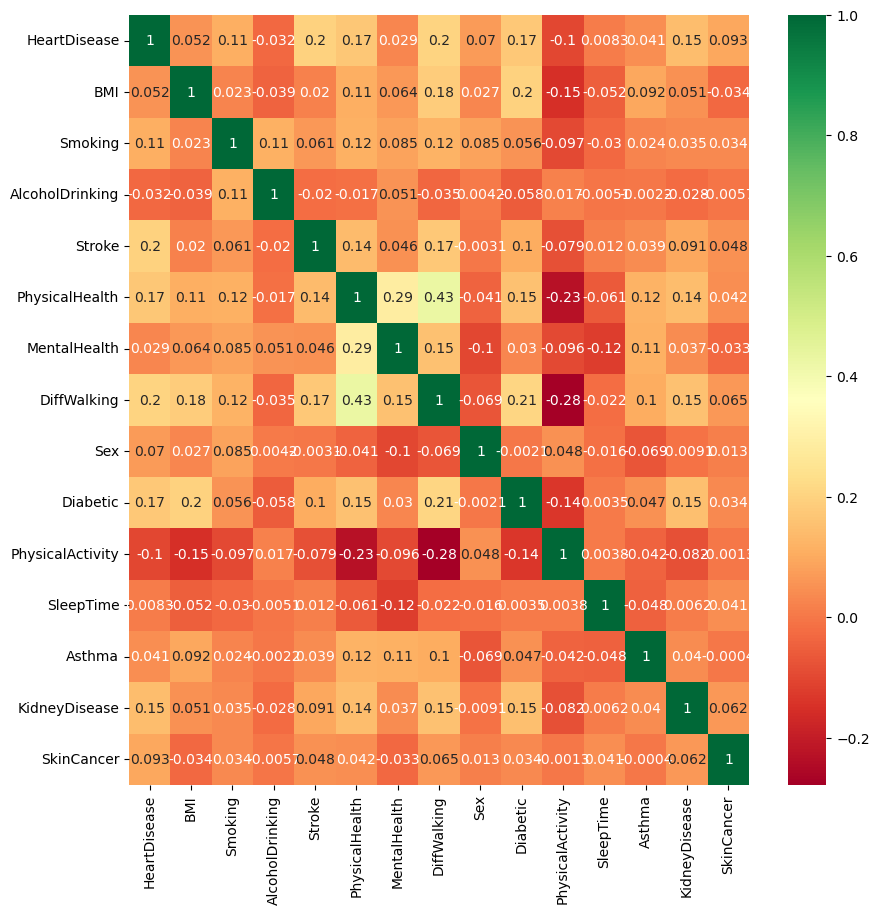

In [58]:
#get correlations of each features in dataset
c = ds.corr()
top_corr_features = c.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(ds[top_corr_features].corr(),annot=True,cmap="RdYlGn" )

In [59]:
# with follwing fun we select the highly corralation feature 
# it will remove the 1st feature which highly corr the any feature 
def correlation(ds,threshold):
    cor=set()   #all names of corr columns
    cor_matrix=ds.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs(cor_matrix.iloc[i,j])>threshold:#we are intersted in absolute coeeficient if not intersted remove abs fun
                colname=cor_matrix.columns[i]# geting name of columns
                cor.add(colname)
    return cor
            
    
cor_feature=correlation(ds,0.95)
len(set(cor_feature))

cor_feature

ds.drop(cor_feature,axis=1) # train data same use in test data also

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,0,0,Good,12.0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

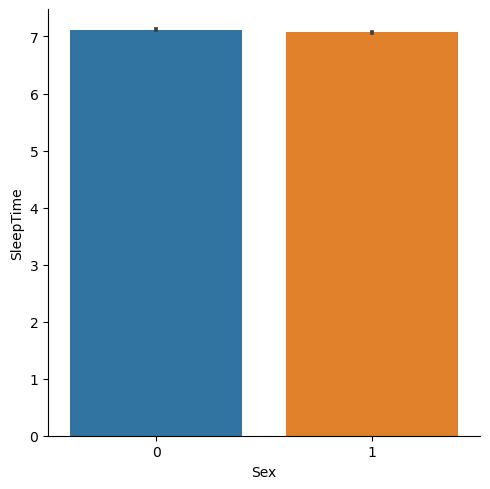

In [60]:
sns.catplot(x="Sex",y="SleepTime",data=ds,kind="bar")
plt.show

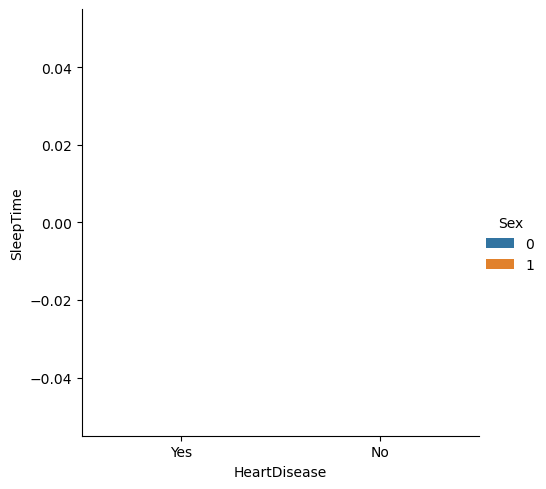

In [61]:
sns.catplot(x="HeartDisease",y="SleepTime",data=ds,kind="bar",order=["Yes","No"],hue="Sex")
plt.show()

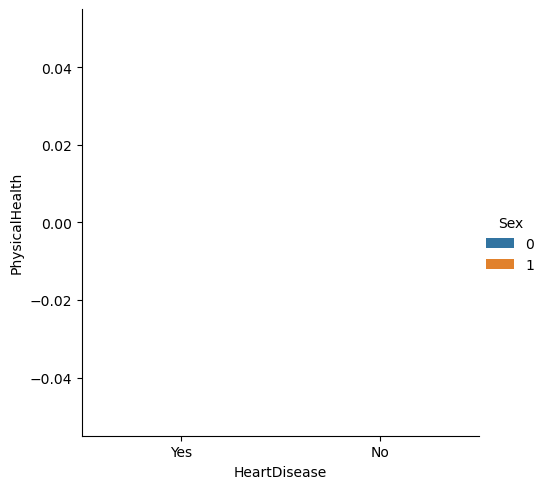

In [62]:
sns.catplot(x="HeartDisease",y="PhysicalHealth",data=ds,kind="bar",order=["Yes","No"],hue="Sex")
plt.show()

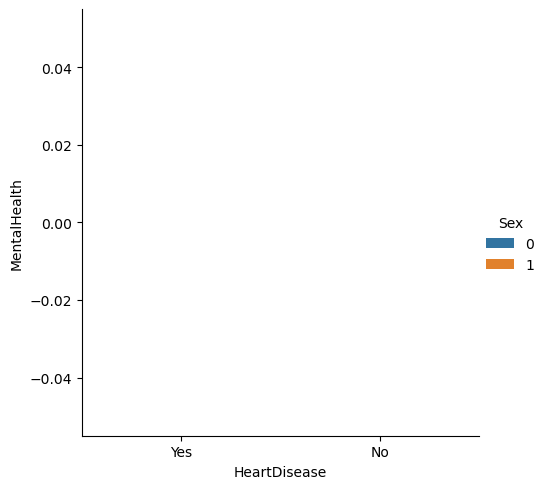

In [63]:
sns.catplot(x="HeartDisease",y="MentalHealth",data=ds,kind="bar",order=["Yes","No"],hue="Sex")
plt.show()

In [64]:
#save the file in csv 
ds.to_csv("EDA only.csv",index=False)

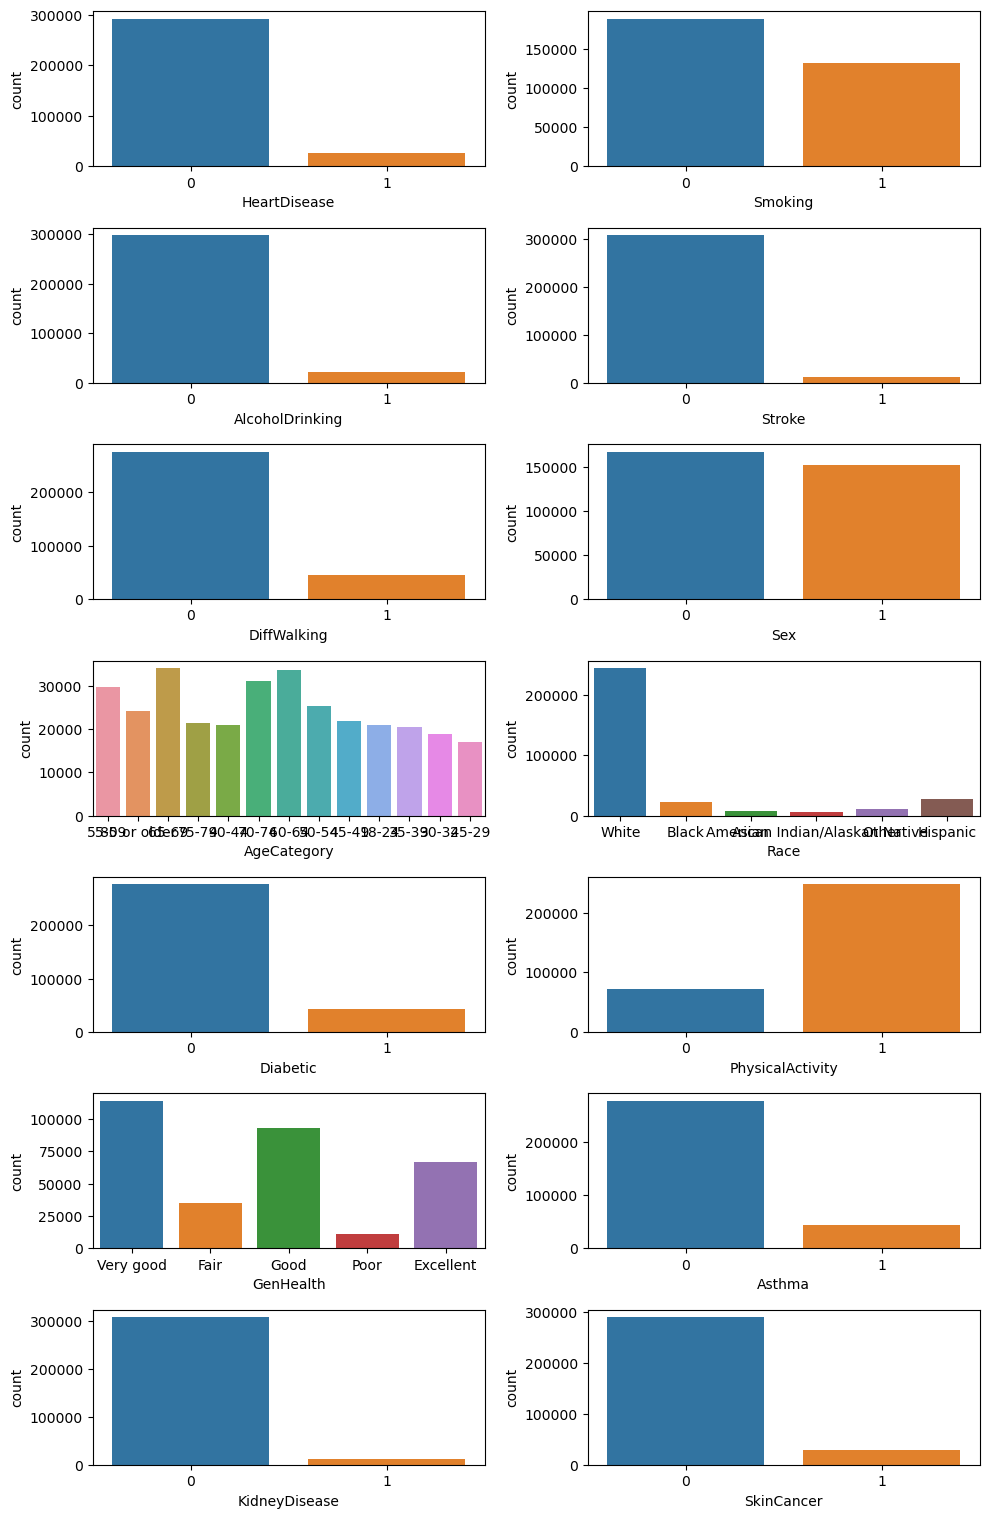

In [73]:
plt.figure(figsize=(10,30))
for i ,column in enumerate(catgorical):
    plt.subplot(len(catgorical),2,i+1)
    
    sns.countplot(x=column,data=ds)
    #plt.show()
    plt.tight_layout()